In [1]:
import pandas as pd
import nltk
import string
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors 
artigos = pd.read_csv("resources/some_edit_articles_original_.csv",low_memory=False)
artigos = artigos.query("editoria!='pioneiro'")
artigos = artigos.query("artigoSubeditoria!='horoscopo'")

MÉTODOS

In [2]:
modelo = KeyedVectors.load_word2vec_format("resources/cbow_s300.txt")

In [3]:
artigos = artigos.drop_duplicates(subset='artigoId')

In [4]:
artigos = artigos.reset_index()

In [5]:
# Separa o texto em palavras
def tokenizador(texto):
    texto = str(texto).lower()
    lista_alfanumerica = []
    for token_valido in nltk.word_tokenize(texto):
        if token_valido in string.punctuation: continue
        lista_alfanumerica.append(token_valido)
    return lista_alfanumerica

In [6]:
# Remove as stop words
def remove_stop_words(artigos):
    palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
    frase_processada = list()
    for opiniao in artigos.artigoTitulo:
        nova_frase = list()
        palavras_texto = tokenizador(opiniao)
        for palavra in palavras_texto:
            if palavra not in palavras_irrelevantes:
                nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    artigos["tratamento_1"] = frase_processada
    return artigos
remove_stop_words(artigos)

,index,artigoId,dataEdit,artigoTitulo,tags,editoria_completa,editoria,subeditoria1,subeditoria2,usuarioId,dataZm,artigoSubeditoria,tratamento_1
0,1,cl19roahi002z017c1hx0k7vs,2022-03-27,Em meio a protestos de artistas contra proibiç...,jair-bolsonaro,cultura-e-lazer/musica,cultura-e-lazer,musica,NaN,2d9a9439-351f-4636-9d8c-18633929bf5f,2022-03-27,NaN,meio protestos artistas contra proibição manif...
1,2,ckzly5v14003l015pow47mjld,2022-02-13,O Grêmio está perdendo tempo com Vagner Mancini,gremio,colunistas/alex-bage,colunistas,alex-bage,NaN,from-wrs:929979,2022-02-14,alex-bage,grêmio perdendo tempo vagner mancini
2,4,ckyho15mj002f01885veb6riv,2022-01-16,Os tambores de guerra voltam a soar na Europa,europa,colunistas/rodrigo-lopes,colunistas,rodrigo-lopes,NaN,from-wrs:3247378,2022-01-16,rodrigo-lopes,tambores guerra voltam soar europa
3,8,cl19w6hgx004m016531jjw1a8,2022-03-27,Interesse mútuo e mensagem enigmática pautam c...,tete,colunistas/leonardo-oliveira,colunistas,leonardo-oliveira,NaN,from-wrs:1112065,2022-03-27,leonardo-oliveira,interesse mútuo mensagem enigmática pautam con...
4,9,ckygazeio001p015pulohic40,2022-01-15,"Trailblazer: espaço, conforto e tecnologias qu...",diesel-turbo,comportamento/carros/sobre-rodas,comportamento,carros,sobre-rodas,19ba7a7b-47fc-421b-8c8c-ecf93d10970e,2022-01-16,carros,trailblazer espaço conforto tecnologias auxili...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23437,1409666,cl1fl2nd900dc017cl0mnond3,2022-03-31,Schirmer reforça pedido de demissão e fica liv...,cezar-schirmer,colunistas/rosane-de-oliveira,colunistas,rosane-de-oliveira,NaN,from-wrs:769571,2022-03-31,rosane-de-oliveira,schirmer reforça pedido demissão fica livre co...
23438,1409713,cl1f8nxe0008j0165aupc2xjx,2022-03-31,Zucco troca o PL pelo Republicanos menos de um...,eleicoes-2022,colunistas/rosane-de-oliveira,colunistas,rosane-de-oliveira,NaN,from-wrs:139801,2022-03-31,rosane-de-oliveira,zucco troca pl republicanos menos mês após fil...
23439,1409786,cl1dz1qp7008e017cclu6tnap,2022-03-31,O grande desafio de Roger Machado no Grêmio,roger-machado,colunistas/pedro-ernesto-denardin,colunistas,pedro-ernesto-denardin,NaN,10a33a289e93f0ce8a8570e61cee5b646dbe3ce32deeed...,2022-03-31,pedro-ernesto-denardin,grande desafio roger machado grêmio
23440,1409787,cl1e80dy200cf0165drbfag1e,2022-03-31,O prazo para Romildo definir seu futuro,romildo-bolzan,colunistas/pedro-ernesto-denardin,colunistas,pedro-ernesto-denardin,NaN,from-wrs:83935,2022-03-31,pedro-ernesto-denardin,prazo romildo definir futuro


In [7]:
import re
def limpar_sentenca(sentenca):
    return re.sub('[\W_]+', ' ', sentenca)

artigos["tratamento_1"] = artigos["tratamento_1"].apply(lambda x: limpar_sentenca(x))


In [8]:
def remove_numeros(texto):
    number_free = re.sub(r"\d+", "", texto)
    return number_free

artigos["tratamento_1"] = artigos["tratamento_1"].apply(lambda x: remove_numeros(x))


In [9]:
def remove_caractere(sentenca):
  rx = re.compile(r'\b(?:\d+|[a-z])\b\s+')
  return rx.sub('', sentenca)

artigos["tratamento_1"] = artigos["tratamento_1"].apply(lambda x: remove_caractere(x))


In [11]:
def media_vetores(x):

    global word_embeddings
    word_embeddings = []
    for line in artigos['tratamento_1']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in modelo.key_to_index:
                count += 1
                if avgword2vec is None:
                    avgword2vec = modelo[word]
                else:
                    avgword2vec = avgword2vec + modelo[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            word_embeddings.append(avgword2vec)

In [12]:
def recomendacoes(artigoTitulo):
    
    media_vetores(artigos)
    
    cosine_similarities = cosine_similarity(word_embeddings, word_embeddings)
    #print(cosine_similarities)
    articles = artigos['artigoTitulo']

    indices = pd.Series(artigos.index, index = artigos['artigoTitulo']).drop_duplicates()

    idx = indices[artigoTitulo]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    #print(sim_scores)
    articles_indices = [i[0] for i in sim_scores]
    
    recommend = pd.DataFrame(articles.iloc[articles_indices])
    #recommend = articles.iloc[articles_indices].tolist()
    return recommend
    

In [15]:
def combinacao_de_vetores_por_soma(palavras_numeros):
    global vetor_resultante
    
    vetor_resultante = np.zeros(300)
    
    for pn in palavras_numeros:
        try:
            vetor_resultante += modelo.get_vector(pn)

        except KeyError:
            if pn.isnumeric():
                pn = "0" * len(pn)
                vetor_resultante += modelo.get_vector(pn)
                
            else:
                vetor_resultante += modelo.get_vector("unknown")

    return vetor_resultante.reshape(1,-1)
artigos['vetores'] = artigos.tratamento_1.apply(combinacao_de_vetores_por_soma)

In [ ]:
def artigos_do_usuario(usuario):
    artigos_do_usuario = artigos.query("usuarioId=='%s'" % usuario).sort_values("dataZm",ascending=False).head(1)
    return artigos_do_usuario.artigoTitulo.iloc[0]

TESTES COM OS MODELOS

In [44]:
def matriz_vetores(textos):
    x = len(textos)
    y = 300
    matriz = np.zeros((x,y))
    
    for i in range(x):
        palavras_numeros = tokenizador(textos.iloc[i])
        matriz[i] = combinacao_de_vetores_por_soma(palavras_numeros)
    return matriz

In [45]:
artigos_nova_versao = pd.read_csv("resources/some_edit_articles_original_new_fields.csv",low_memory=False)

In [54]:
matriz_vetores_treino = matriz_vetores(artigos_nova_versao.artigoTitulo)
matriz_vetores_teste = matriz_vetores(artigos.artigoTitulo)

In [56]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 200)
LR.fit(matriz_vetores_treino,artigos_nova_versao.editoria)

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import classification_report

label_prevista = LR.predict(matriz_vetores_teste)
CR = classification_report(artigos_nova_versao.editoria, label_prevista)
print(CR)

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                          precision    recall  f1-score   support

                ambiente       0.87      0.47      0.61     22710
              colunistas       0.54      0.54      0.54    116128
           comportamento       0.29      0.20      0.24     15826
     coronavirus-servico       0.31      0.43      0.36      2704
         cultura-e-lazer       0.50      0.76      0.60     42664
           destemperados       0.57      0.61      0.59      4883
                   donna       0.49      0.30      0.37     21716
                economia       0.45      0.48      0.46     20466
educacao-e-eleicoes-2020       0.00      0.00      0.00       311
      educacao-e-emprego       0.55      0.51      0.53      8573
                esportes       0.78      0.92      0.84    142058
                   geral       0.49      0.47      0.48     57565
   grupo-de-investigacao       0.46      0.03      0.05      1826
                   http:       0.00      0.00      0.00       233
         

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [50]:
modelo_skip_gram = KeyedVectors.load_word2vec_format('resources/skip_s300.txt')

In [64]:
def combinacao_de_vetores_por_soma_skip(palavras_numeros):
    global vetor_resultante
    
    vetor_resultante = np.zeros(300)
    
    for pn in palavras_numeros:
        try:
            vetor_resultante += modelo_skip_gram.get_vector(pn)

        except KeyError:
            if pn.isnumeric():
                pn = "0" * len(pn)
                vetor_resultante += modelo_skip_gram.get_vector(pn)
                
            else:
                vetor_resultante += modelo_skip_gram.get_vector("unknown")

    return vetor_resultante

In [65]:
def matriz_vetores_sk(textos):
    x = len(textos)
    y = 300
    matriz = np.zeros((x,y))
    
    for i in range(x):
        palavras_numeros = tokenizador(textos.iloc[i])
        matriz[i] = combinacao_de_vetores_por_soma_skip(palavras_numeros)
    return matriz

In [71]:
matriz_vetores_treino_sk = matriz_vetores(artigos_nova_versao.artigoTitulo)
matriz_vetores_teste_sk = matriz_vetores(artigos.artigoTitulo)

In [72]:
LR_sk = LogisticRegression(max_iter = 1000)
LR_sk.fit(matriz_vetores_treino_sk,artigos_nova_versao.editoria)
LR_sk.score(matriz_vetores_teste_sk, artigos_nova_versao.editoria)
from sklearn.metrics import classification_report

label_prevista_sk = LR.predict(matriz_vetores_teste_sk)
CR_sk = classification_report(artigos.editoria, label_prevista_sk)
print(CR_sk)

ANÁLISES

In [39]:
todas_palavras = ' '.join([texto for texto in artigos.tratamento_1])
token_frase = tokenizador(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra":list(frequencia.keys()), "Frequência": list(frequencia.values())})
df_frequencia

,Palavra,Frequência
0,meio,133
1,protestos,51
2,artistas,25
3,contra,1131
4,proibição,17
...,...,...
24176,trucks,1
24177,definiu,1
24178,acessarem,1
24179,blefe,1


In [40]:
top_100_palavras = df_frequencia.nlargest(columns="Frequência",n=100)
frequencia_palavras = pd.DataFrame()
frequencia_palavras['Palavra'] = top_100_palavras.Palavra
frequencia_palavras['vetores'] = top_100_palavras.Palavra.apply(combinacao_de_vetores_por_soma)
frequencia_palavras

,Palavra,vetores
276,``,"[[0.7091320157051086, -0.10962200164794922, -0..."
208,diz,"[[0.5345890056341887, 0.3935239911079407, -0.1..."
349,ucrânia,"[[0.6417389996349812, -0.24655398726463318, -0..."
289,após,"[[0.04225100390613079, -0.09402699768543243, -..."
12,grêmio,"[[0.7647510003298521, 0.2882860079407692, -0.4..."
...,...,...
1258,onu,"[[0.6412729918956757, -0.055762000381946564, -..."
404,estado,"[[0.3599759843200445, 0.2509479944128543, -0.6..."
420,“,"[[0.3545660078525543, -0.05481100082397461, -0..."
422,”,"[[0.3545660078525543, -0.05481100082397461, -0..."


In [41]:
x = np.concatenate(artigos['vetores'].values)
x_ = np.concatenate(frequencia_palavras['vetores'].values)

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_nth_vectors_2d_space(labels, tokens):
    tsne_model = TSNE(perplexity=25, n_components=5, init='pca', n_iter=2500, random_state=23)
    #new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in x_:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()



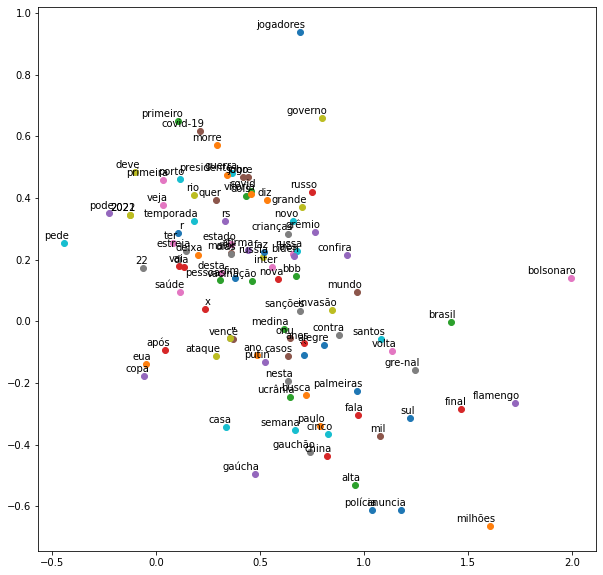

In [43]:
labels, tokens = list(frequencia_palavras.Palavra.values), list(frequencia_palavras.vetores.values)
plot_nth_vectors_2d_space(labels, tokens)

In [20]:
artigos[artigos['artigoTitulo'].str.contains('Ucranianos na China', na=False)]

,index,artigoId,dataEdit,artigoTitulo,tags,editoria_completa,editoria,subeditoria1,subeditoria2,usuarioId,dataZm,artigoSubeditoria,tratamento_1,vetores
23007,1389885,cl1dhotkr000x01iwei5goaet,2022-03-30,Ucranianos na China combatem desinformação sob...,china,mundo,mundo,NaN,NaN,from-wrs:3157080,2022-03-30,NaN,ucranianos china combatem desinformação sobre ...,"[[7.522206004243344, 0.7839750172570348, -3.27..."


In [21]:
recomendacoes(artigos_do_usuario('from-wrs:3157080'))

,artigoTitulo
9832,"Scholz: Otan terá resposta unificada, se Rússi..."
19696,Mil voluntários chechenos estão a caminho da U...
7848,Junta militar de Burkina Faso está 'aberta' a ...
22694,Londres confisca superiate de um russo como 'a...
18592,Quais as chances de a Otan entrar na guerra co...


In [30]:
from sklearn.cluster import KMeans
x = np.concatenate(artigos['vetores'].values)
kmeans = KMeans(n_clusters=50)
kmeans.fit(x)
artigos['cluster'] = kmeans.predict(x)


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
pca_result = pca.fit_transform(x)
artigos['x'] = pca_result[:, 0]
artigos['y'] = pca_result[:, 1]

In [32]:
df = recomendacoes(artigos_do_usuario('2d9a9439-351f-4636-9d8c-18633929bf5f'))
df['cluster'] = artigos.cluster
df['vetores'] = artigos.vetores
df['x'] = artigos.x
df['y'] = artigos.y
df['editoria'] = artigos.editoria
df

,artigoTitulo,cluster,vetores,x,y,editoria
927,Lollapalooza e PT recorrem de decisão do TSE d...,42,"[[11.445256005506963, -0.5303509675431997, -4....",28.139528,15.625310,politica
951,Lollapalooza pede a ministro do TSE que recons...,42,"[[11.60185294225812, -0.4567859924864024, -5.0...",28.322446,4.622434,politica
936,PT vai ao TSE contra restrição a manifestações...,30,"[[9.872330968733877, -0.9617609931156039, -3.5...",8.185701,8.751478,politica
22477,Deputados repercutem decisão de Leite de renun...,43,"[[6.908554976340383, 1.1604680113960057, -4.66...",3.652651,-9.143929,politica
983,TSE proíbe manifestações políticas no Lollapal...,28,"[[7.892359986901283, -1.586490991525352, -2.75...",-16.625717,11.546638,politica


In [33]:
import plotly.express as px
fig = px.scatter(
df, x='x', y='y', color='cluster', hover_data=['x', 'y', 'artigoTitulo'],title='Recomendações de artigos a partir do último artigo lido pelo usuário:2d9a9439-351f-4636-9d8c-18633929bf5f',text='artigoTitulo')
fig.show()

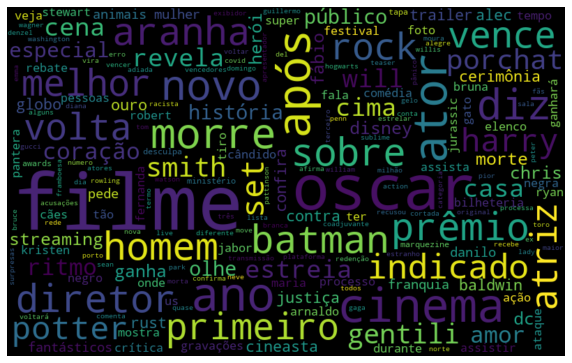

In [ ]:
from wordcloud import WordCloud
usuario_cinema = artigos.query("artigoSubeditoria=='cinema'")
import matplotlib.pyplot as plt
palavras = ' '.join([texto for texto in usuario_cinema.tratamento_1])
nuvem_palavras = WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras,interpolation='bilinear')
plt.axis("off")
plt.show()

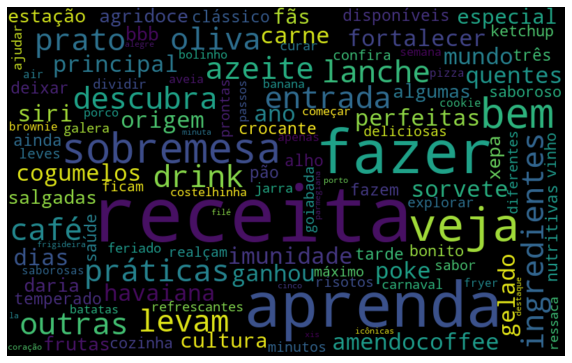

In [ ]:
from wordcloud import WordCloud
usuario_receita = artigos.query("artigoSubeditoria=='receitas'")
import matplotlib.pyplot as plt
palavras = ' '.join([texto for texto in usuario_receita.tratamento_1])
nuvem_palavras = WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
artigos[artigos['artigoTitulo'].str.contains('Lollapalooza', na=False)]
recomendacoes(artigos_do_usuario('2d9a9439-351f-4636-9d8c-18633929bf5f'))

,artigoTitulo
927,Lollapalooza e PT recorrem de decisão do TSE d...
951,Lollapalooza pede a ministro do TSE que recons...
936,PT vai ao TSE contra restrição a manifestações...
22478,Milton Ribeiro pede demissão do cargo de minis...
983,TSE proíbe manifestações políticas no Lollapal...


In [58]:
def dispersao_distancia_palavras(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



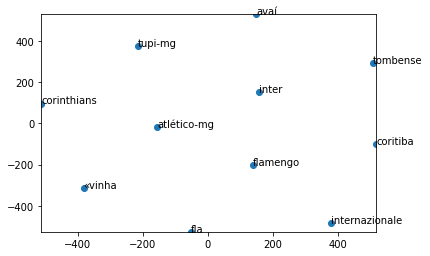

In [59]:
dispersao_distancia_palavras(modelo,'inter')

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



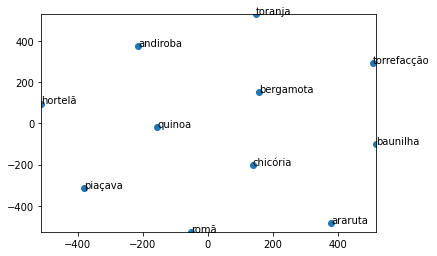

In [60]:
dispersao_distancia_palavras(modelo,'bergamota')

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



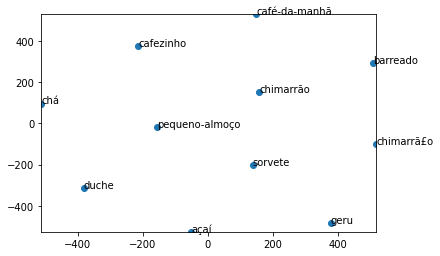

In [62]:
dispersao_distancia_palavras(modelo,'chimarrão')

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\Maria_Peralta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



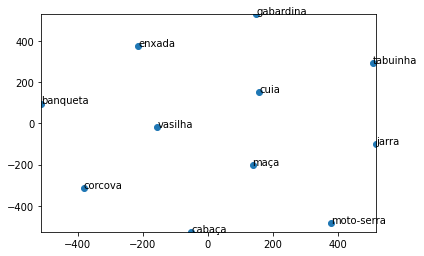

In [63]:
dispersao_distancia_palavras(modelo,'cuia')